In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
psdf = pd.read_csv("co2_emissions_canada.csv")

In [47]:
psdf

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [48]:
psdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [49]:
psdf.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,7385,42,FORD,628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,7385,2053,F-150 FFV 4X4,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Class,7385,16,SUV - SMALL,1217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),7385.0,NaN,NaN,NaN,3.160068,1.35417,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,NaN,NaN,NaN,5.61503,1.828307,3.0,4.0,6.0,6.0,16.0
Transmission,7385,27,AS6,1324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel Type,7385,5,X,3637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel Consumption Comb (L/100 km),7385.0,NaN,NaN,NaN,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
CO2 Emissions(g/km),7385.0,NaN,NaN,NaN,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [50]:
a = sorted(list(psdf['Engine Size(L)']))
n = len(a)
print(n/2)
a[(n//2)+1]

3692.5


3.0

### 1. What is the median engine size in liters?

The Engine size(L) column of the dataset describes the size of engine in litres that is used in the vehicle.

In the initial analysis, the column has the lowest and largest value of 0.9 and 8.4 respectively, with a mean of about 3.16.


In [51]:
np.median(psdf['Engine Size(L)'])

3.0


From the above code, it is clear that the median of Engine Size is **3.0**.


In [52]:
a = list(psdf['Fuel Type'].unique())
b = []
for i in range(len(a)):
    b.append("{} : {}".format(a[i],list(psdf['Fuel Type']).count(a[i])))
b

['Z : 3202', 'D : 175', 'X : 3637', 'E : 370', 'N : 1']

### Question 2 : What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?


​
​
The Fuel Type field is a categorical variable with **5** unique values which are **"X", "Z", "E", "D", and "N"** occuring **3637, 3202, 370, 175 and 1** times respectively. The type is not asked in the question. Hence, we will exclude it while calculating the average fuel consumption.
​
​


In [53]:
psdf[psdf['Fuel Type'] == 'N']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS6,N,12.7,213


In [54]:
fTdf = psdf.groupby('Fuel Type').agg(np.average).reset_index(drop=False)
fTdf = fTdf[fTdf['Fuel Type'] != 'N'].sort_values(ascending=True, by='Fuel Consumption Comb (L/100 km)')[['Fuel Type','Fuel Consumption Comb (L/100 km)']]
fTdf

C:\Users\apal6\AppData\Local\Temp\ipykernel_14236\1442872963.py:1: FutureWarning: ['Make', 'Model', 'Vehicle Class', 'Transmission'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  fTdf = psdf.groupby('Fuel Type').agg(np.average).reset_index(drop=False)


,Fuel Type,Fuel Consumption Comb (L/100 km)
0,D,8.835429
3,X,10.084575
4,Z,11.422767
1,E,16.861351


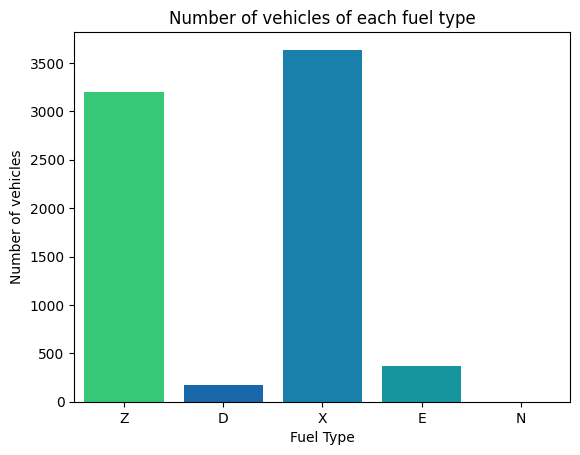

In [55]:
colors=['#1fe074','#0069c0','#008ac5','#00a9b5','#00c698','#0045a5']
customPalette = sns.set_palette(sns.color_palette(colors))
sns.countplot(data=psdf,x='Fuel Type',palette=customPalette).set(xlabel='Fuel Type',ylabel='Number of vehicles',title="Number of vehicles of each fuel type")
plt.show()

The graph shows the values of each fuel type in the dataset. Now we will calculate the average fuel consumption by grouping Fuel type.

The above tables shows the Average Fuel Consumption in (L/100 km) for vehicles of Fuel Type **"X", "Z", "E", and "D"** which is **10.08, 11.42, 16.86, and 8.84** after rounding off to the 2 decimal point. 

The Average Fuel Consumption is **lowest** for Fuel Type **"D"** and **highest** for Fuel Type **"E"**.

**NOTE :** The Fuel Type **"N"** only contains one record (row) which has a Fuel Consumption Value of **12.7**

### What is the correlation between fuel consumption and CO2 emissions?

The following Scatterplot indicates a high correlation between Fuel Consumption and CO2 Emission. If you carefully see the scatterplot, you would notice three straight line diagonally in the plot.


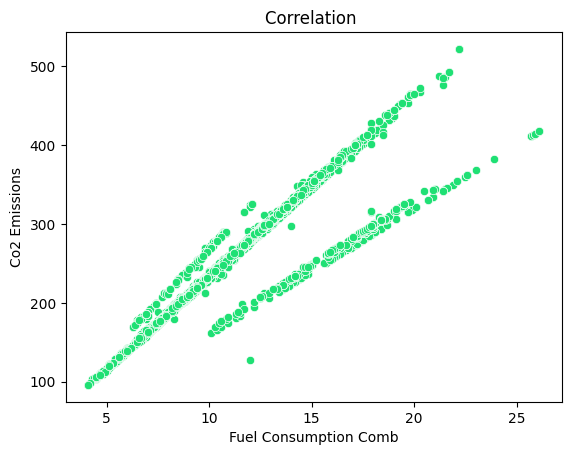

In [56]:
sns.scatterplot(data=psdf,x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions(g/km)').set(xlabel ="Fuel Consumption Comb", ylabel = "Co2 Emissions", title ='Correlation ')
plt.show()

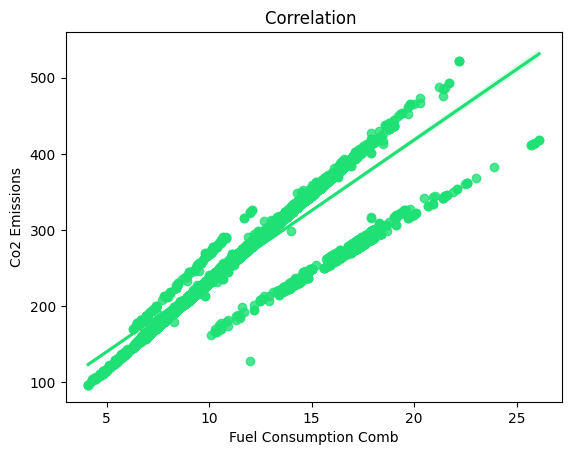

In [57]:
sns.regplot(data=psdf,x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions(g/km)').set(xlabel ="Fuel Consumption Comb", ylabel = "Co2 Emissions", title ='Correlation ')
plt.show()

In [58]:
round(psdf['Fuel Consumption Comb (L/100 km)'].corr(psdf['CO2 Emissions(g/km)']),2)

0.92


From above, it is clear that **Fuel Consumption and Co2 Emissions** have highly positive correlation. 


### Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?

In [59]:
lCo2Emi = psdf.sort_values(ascending=False,by="Vehicle Class")
lCo2Emi = lCo2Emi.groupby('Vehicle Class').agg(np.mean).reset_index(drop=False)
lCo2Emi = lCo2Emi[['Vehicle Class','CO2 Emissions(g/km)']]
lCo2Emi2 = lCo2Emi[lCo2Emi['Vehicle Class'].isin(["MID-SIZE","SUV - SMALL"])]
lCo2Emi2

C:\Users\apal6\AppData\Local\Temp\ipykernel_14236\3485578738.py:2: FutureWarning: The operation <function mean at 0x000001FE7F488DC0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  lCo2Emi = lCo2Emi.groupby('Vehicle Class').agg(np.mean).reset_index(drop=False)


,Vehicle Class,CO2 Emissions(g/km)
2,MID-SIZE,222.455428
11,SUV - SMALL,236.292523


In [60]:
MSco2 = lCo2Emi[lCo2Emi['Vehicle Class'].isin(["MID-SIZE"])]
SSco2 = lCo2Emi[lCo2Emi['Vehicle Class'].isin(["SUV - SMALL"])]

In [61]:
MSco2

,Vehicle Class,CO2 Emissions(g/km)
2,MID-SIZE,222.455428


In [62]:
SSco2

,Vehicle Class,CO2 Emissions(g/km)
11,SUV - SMALL,236.292523


In [63]:
np.mean(MSco2['CO2 Emissions(g/km)'])

222.45542806707854

In [64]:
np.mean(SSco2['CO2 Emissions(g/km)'])

236.29252259654888

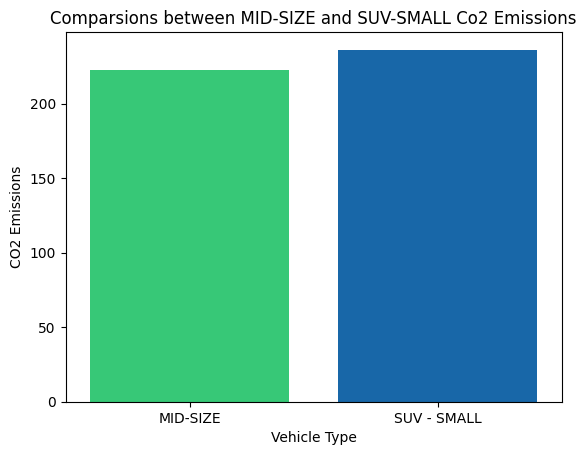

In [65]:
sns.barplot(x='Vehicle Class',y='CO2 Emissions(g/km)',data=lCo2Emi2).set(xlabel="Vehicle Type",ylabel="CO2 Emissions",title="Comparsions between MID-SIZE and SUV-SMALL Co2 Emissions")
plt.show()

From above barplot and dataframe, it is clear that vehicle of **MID-SIZE** class have lower **CO2 Emissions** than vehicle of **SUV-SMALL** class.

The Average CO2 Emissions for MID-SIZE vehicle class is **222.45**.

The Average CO2 Emissions for SUV-SMALL vehicle class is **236.30**.

### What are the average CO2 emissions for all vehicles?

In [66]:
np.mean(psdf['CO2 Emissions(g/km)'])

250.58469871360867

The average CO2 Emissions for all the vehicles is **250.58**.

### For vehicles with an engine size of 2.0 liters or smaller?

In [67]:
np.mean((psdf[psdf['Engine Size(L)'] <= 2])['CO2 Emissions(g/km)'])

198.26783530370975

The average CO2 Emissions for all the vehicles with an engine size of 2.0 Litres or smaller is **198.27**.

### Other Insights Calculations

The other insights that i have found during the analysis are :

**1** - The CO2 Emissions are highest and lowest for **VAN-PASSENGER**  and **STATION WAGON - SMALL** respectively.

The following barplot shows the difference.

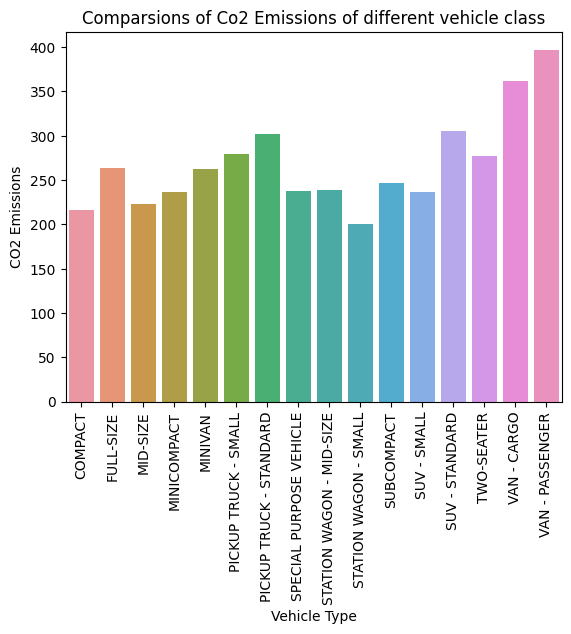

In [68]:
sns.barplot(x='Vehicle Class',y='CO2 Emissions(g/km)',data=lCo2Emi).set(xlabel="Vehicle Type",ylabel="CO2 Emissions",title="Comparsions of Co2 Emissions of different vehicle class")
plt.xticks(rotation = 90) 
plt.show()

In [69]:
round(psdf['Cylinders'].corr(psdf['CO2 Emissions(g/km)']),2)

0.83


**2** - The correlation between Cylinders and CO2 Emissions is **0.83**.


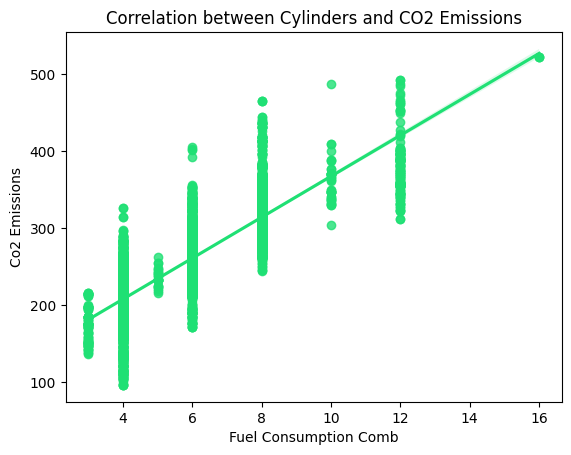

In [70]:
sns.regplot(data=psdf,x='Cylinders',y='CO2 Emissions(g/km)').set(xlabel ="Fuel Consumption Comb", ylabel = "Co2 Emissions", title ='Correlation between Cylinders and CO2 Emissions')
plt.show()

In [76]:
!pip install nbconvert[webpdf]

     ---------------------------------------- 83.4/83.4 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 140.6/140.6 kB 8.7 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 155.3/155.3 kB ? eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00


In [78]:
import nbconvert 

In [80]:
!jupyter nbconvert --to webpdf --allow-chromium-download Solution.ipynb

[NbConvertApp] Converting notebook Solution.ipynb to webpdf
[NbConvertApp] Building PDF
[INFO] Starting Chromium download.

  0%|          | 0.00/137M [00:00<?, ?b/s]
  2%|2         | 2.83M/137M [00:00<00:13, 9.60Mb/s]
  5%|4         | 6.59M/137M [00:00<00:07, 17.9Mb/s]
  7%|6         | 8.94M/137M [00:00<00:06, 18.4Mb/s]
  8%|8         | 11.1M/137M [00:00<00:07, 16.8Mb/s]
  9%|9         | 13.0M/137M [00:00<00:07, 16.1Mb/s]
 11%|#         | 14.7M/137M [00:00<00:07, 16.0Mb/s]
 12%|#1        | 16.3M/137M [00:01<00:07, 15.5Mb/s]
 13%|#3        | 17.9M/137M [00:01<00:07, 15.6Mb/s]
 14%|#4        | 19.7M/137M [00:01<00:07, 15.6Mb/s]
 16%|#5        | 21.2M/137M [00:01<00:07, 15.3Mb/s]
 17%|#6        | 22.9M/137M [00:01<00:07, 15.3Mb/s]
 18%|#7        | 24.5M/137M [00:01<00:07, 14.9Mb/s]
 19%|#9        | 26.2M/137M [00:01<00:07, 15.1Mb/s]
 20%|##        | 28.1M/137M [00:01<00:06, 15.7Mb/s]
 22%|##1       | 29.6M/137M [00:01<00:07, 15.3Mb/s]
 23%|##2       | 31.3M/137M [00:02<00:06, 15.3Mb/s]
 